In [1]:
# imports
import numpy as np

%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib import gridspec
from mpl_toolkits.mplot3d import Axes3D

from sklearn.decomposition import PCA

import scipy.interpolate as interp
import scipy.interpolate as interp1d

import ipywidgets as widgets
from IPython.display import display

import warnings
warnings.filterwarnings('ignore')

from IPython.display import clear_output

import ripser as rp
from persim import plot_diagrams

In [2]:
from itertools import product

import numpy as np
from sklearn import datasets
from scipy.stats import multivariate_normal as mvn
import matplotlib.pyplot as plt

from ripser import Rips
from persim import PersImage

In [3]:
# import custom functions
from TDA_helper_fcns import load_data
from TDA_helper_fcns import plot_gests

In [4]:
tst = load_data(subjects=["05", "11", "30"])

In [5]:
# arbitrarily selecting modality 1
seq511 = tst["05"]["3_0_2"][:, 0:5]

<IPython.core.display.Javascript object>


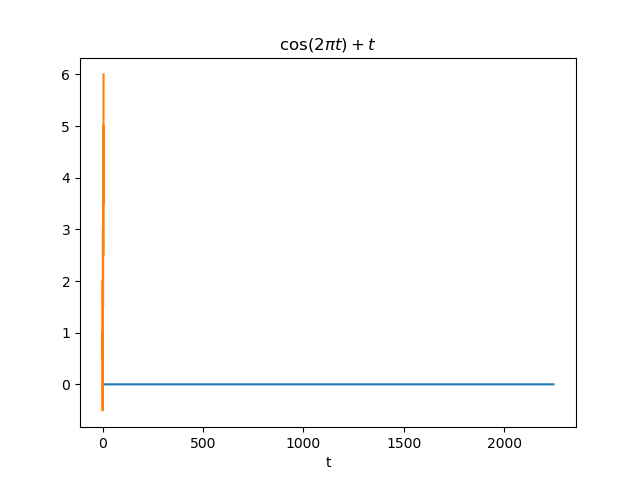

In [6]:
plot_gests("05", "3_0_2", tst, 1)

Check out Wasserstein and Bottleneck Lab and link below to Ripser docs

https://ripser.scikit-tda.org/notebooks/Lower%20Star%20Time%20Series.html

In [9]:
#Do all of the imports and setup inline plotting
import time
import numpy as np
from scipy import sparse
from ripser import ripser
from persim import plot_diagrams
from persim import wasserstein, wasserstein_matching
from persim import bottleneck, bottleneck_matching

%matplotlib notebook
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

import warnings
warnings.filterwarnings('ignore')

<IPython.core.display.Javascript object>


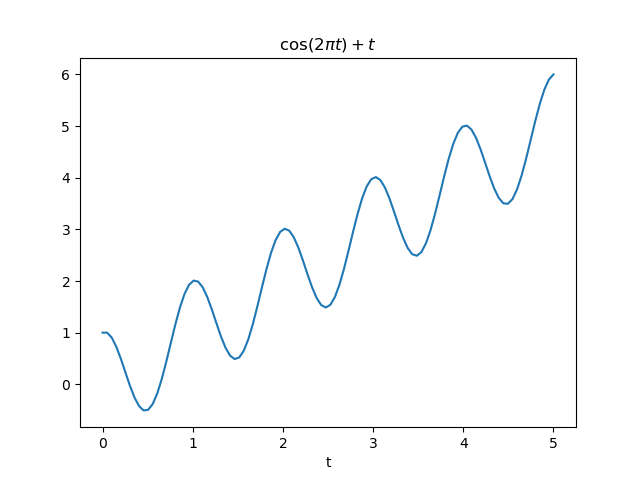

Text(0.5, 0, 't')

In [10]:
N = 100 #The number of points
t = np.linspace(0, 5, N)
x = np.cos(2*np.pi*t) + t

plt.plot(t, x)
plt.title("$\\cos(2 \pi t) + t$")
plt.xlabel("t")

<IPython.core.display.Javascript object>


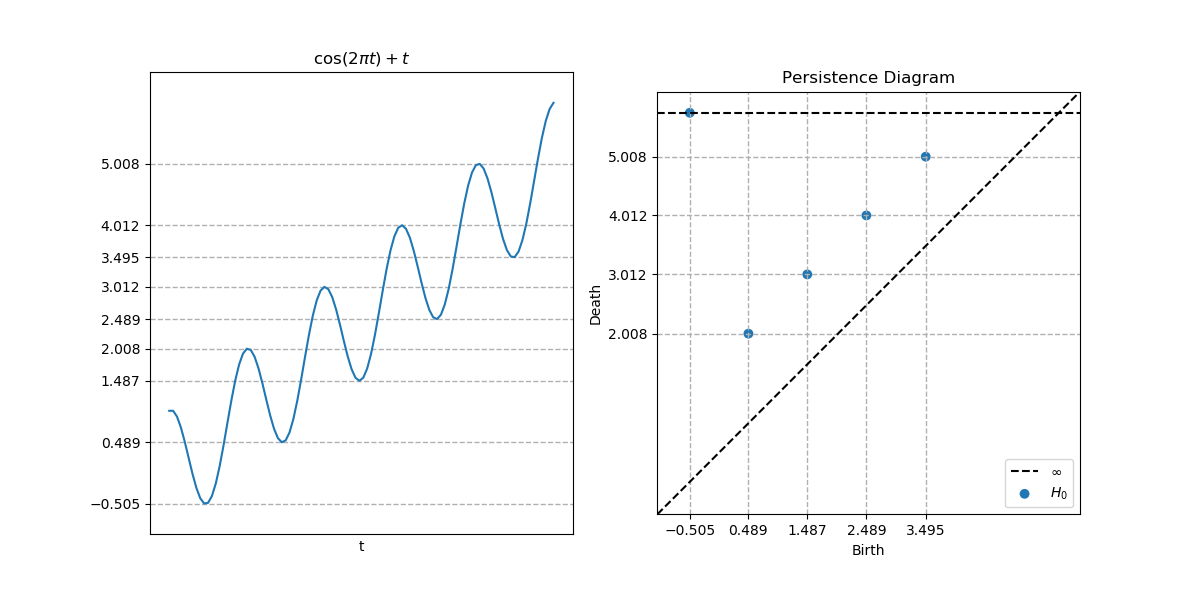

In [11]:
# Add edges between adjacent points in the time series, with the "distance"
# along the edge equal to the max value of the points it connects
I = np.arange(N-1)
J = np.arange(1, N)
V = np.maximum(x[0:-1], x[1::])
# Add vertex birth times along the diagonal of the distance matrix
I = np.concatenate((I, np.arange(N)))
J = np.concatenate((J, np.arange(N)))
V = np.concatenate((V, x))
#Create the sparse distance matrix
D = sparse.coo_matrix((V, (I, J)), shape=(N, N)).tocsr()
dgm0 = ripser(D, maxdim=0, distance_matrix=True)['dgms'][0]
dgm0 = dgm0[dgm0[:, 1]-dgm0[:, 0] > 1e-3, :]
allgrid = np.unique(dgm0.flatten())
allgrid = allgrid[allgrid < np.inf]
xs = np.unique(dgm0[:, 0])
ys = np.unique(dgm0[:, 1])
ys = ys[ys < np.inf]

#Plot the time series and the persistence diagram
plt.figure(figsize=(12, 6))
ylims = [-1, 6.5]
plt.subplot(121)
plt.plot(t, x)
ax = plt.gca()
ax.set_yticks(allgrid)
ax.set_xticks([])
plt.ylim(ylims)
plt.grid(linewidth=1, linestyle='--')
plt.title("$\\cos(2 \pi t) + t$")
plt.xlabel("t")

plt.subplot(122)
ax = plt.gca()
ax.set_yticks(ys)
ax.set_xticks(xs)
plt.ylim(ylims)
plt.grid(linewidth=1, linestyle='--')
plot_diagrams(dgm0, size=50)
plt.title("Persistence Diagram")


plt.show()